In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import WordNetLemmatizer
from datetime import date

In [60]:
from nltk.stem.porter import PorterStemmer
import re
import nltk
from nltk.tokenize import word_tokenize
import pkg_resources
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
if sym_spell.word_count:
    pass
else:
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# normalization
def func_norm(s):
    """
    Perform some basic normalisation operations.

    Parameters
    ----------
    s:  str
        text to operate on
    
    Returns
    -------
        Normalised string
    
    """
    s = s.lower() # lower case
    # letter repetition (>2)
    s  = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # non word repetition
    s = s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # noise text
    s = re.sub(r' ing ', ' ', s)
    # phrase repetition
    s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)

    return s.strip()

def func_punc(w_list):
    """
    Remove non-alphabet characters. Includes punctuation.

    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    
    Returns
    -------
        list without non-alphabet characters
    """
    return [word for word in w_list if word.isalpha()]

def func_stopf(w_list):
    """
    Remove stop words

    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    
    Returns
    -------
        list without stop words
    """
    stop_words = set(stopwords.words('english'))
    w_list  = [f for f in w_list if f not in stop_words]
    return w_list

# stemming
pstem = PorterStemmer()

def func_stem(w_list):
    """
    stem word list

    Parameters
    ----------
    w_list: list
        word list for stemming

    Returns
    -------
        stemmed word list 
    """
    sw_list = [pstem.stem(w) for w in w_list]
    return sw_list

# selecting nouns
def func_noun(w_list):
    """
    in: word list to be processed
    out: w_list with only nouns selected
    """
    return [word for (word, pos) in nltk.pos_tag(w_list) if pos[:2] == 'NN']

def func_verb(w_list):
    """ 
    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    Returns
    -------
        list of verbs only
    """
    return [word for (word,pos) in nltk.pos_tag(w_list) if pos[:2] == 'VB']

def func_adjective(w_list):
    """ 
    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    Returns
    -------
        list of verbs only
    """
    return [word for (word,pos) in nltk.pos_tag(w_list) if pos[:2] == 'JJ']

def func_inf_words(w_list):
    """ 
    Retain verbs, adjectives and nouns only

    Parameters
    ----------
    w_list: list
        list of words to be processed
    Returns
    -------
    list of nouns, adjectives and verbs only
    """
    return [word for (word,pos) in nltk.pos_tag(w_list) if 'VB' in pos or 'JJ' in pos or 'NN' in pos]

# spell checker/typo correction
def func_spell(w_list):
    """
    in: word list to be processed
    out: w_list with typo fixed by symspell. words with no match up will be dropped
    """
    w_list_fixed = []
    for word in w_list:
        if any(map(word.__contains__, ['covid','lockdown'])):
            w_list_fixed.append(word)
        else:
            suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)
            if suggestions:
                w_list_fixed.append(suggestions[0].term)
            else:
                pass
    return w_list_fixed

def get_pos_tag(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def func_lemmatize(word_list):
    """
    Lemmatize word list.

    Parameters
    ----------
    word_list:  list
        words to process
    
    Returns
    -------
    Lemmatized word list.

    """
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.pos_tag(word_list)
    words_lemmatized = [lemmatizer.lemmatize(word,get_pos_tag(tag))
                        for (word,tag) in word_list]
    return words_lemmatized

def preprocess_sent(rw):
    """
    Get sentence level preprocessed data from raw texts

    Parameters
    ----------
        rw: str
            sentence to be processed

    Returns
    -------
        sentence level pre-processed text
    """
    s = func_norm(rw)

    return s



def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences.
    
    Parameters
    ----------
    s:  str
        sentence to be processed
    
    Returns
    -------
        word level pre-processed text
    """
    if not s:
        return None
    w_list = word_tokenize(s)
    w_list = func_punc(w_list)
   # w_list = func_inf_words(w_list)
    w_list = func_spell(w_list)
    w_list = func_lemmatize(w_list)
    w_list = func_stopf(w_list)

    return w_list

def preprocess(docs):
    """
    Preprocess the data.

    Parameters
    ----------
    docs: list
        list of documents to be preprocessed
    
    Returns
    -------
        Preprocessed sentences, tokens
    """
    print('Preprocessing raw texts ...')
    #n_docs = len(docs)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    #samp = np.random.choice(n_docs)
    for i in range(0, len(docs)):
        sentence = preprocess_sent(docs.iloc[i])
        token_list = preprocess_word(sentence)
        if token_list:
            sentences.append(sentence)
            token_lists.append(token_list)
        print('{} %'.format(str(np.round((i + 1) / len(writing_df.writing) * 100, 2))), end='\r')
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists

utils

In [61]:
import scikit_posthocs as sp
from scipy import stats
from textblob import TextBlob
import statsmodels.api as sm
import statsmodels.formula.api as smf


def kruskal_wallis_func(in_df, group_col, test_col):
    """
    Kruskal Wallis test and
    post-hoc Dunn's.

    Parameters
    ----------
    in_df:  pd DataFrame
        input dataframe
    group_col:  str
        name of group column
    test_col:   str
        name of column containing
        relevant values

    Returns
    -------
    Statistic, pvalue
    """
    data = in_df.pivot(columns = group_col, values = test_col)
    if len(in_df[group_col].unique())>2:
            statistic,pval = stats.kruskal(data.iloc[:,0],data.iloc[:,1],
            data.iloc[:,2],nan_policy = 'omit')
            posthoc = sp.posthoc_dunn(
                        [data.iloc[:,0].dropna(),data.iloc[:,1].dropna(),data.iloc[:,2].dropna()],
                        p_adjust = 'bonferroni'
                        )
            key = [data.columns[0],data.columns[1],data.columns[2]]
    else:
        statistic,pval = stats.kruskal(data.iloc[:,0],data.iloc[:,1],
        nan_policy = 'omit')
        posthoc = None
        key = None
    return statistic,pval, posthoc, key


def get_sentiment(in_df, writing_col):
    """
    Get subjectivity
    and polarity scores.

    Parameters
    ----------
    in_df:  pd DataFrame
        DataFrame to operate on
    writing_col: str
        column holding text data
        to operate on
    
    Returns
    -------
    Input DataFrame with
    subjectivity/polarity columns
    added.

    """
    print("Getting sentiment scores...")
    in_df = in_df.assign(
                        polarity = in_df[writing_col].astype('str').apply(
                        [lambda x: TextBlob(x).sentiment.polarity]),
                        subjectivity = in_df[writing_col].astype('str').apply(
                        [lambda x: TextBlob(x).sentiment.subjectivity])
                        )
    print("Done!")
    return in_df

def run_mixedlm(in_df,group_name,formula, re_intercept):
    """ 
    Run statsmodels LMEM.

    Parameters
    ----------
    in_df:  pandas DataFrame
        input dataframe
    group_name: str
        column to group by
    formula:    str
        patsy formula

    Returns
    -------
    MixedLMResults instance
    """
    if re_intercept:
        model = smf.mixedlm(
                            formula, in_df, groups = group_name,re_formula = re_intercept, missing = 'drop'
                            ).fit()
    else:
        model = smf.mixedlm(formula, in_df, groups = group_name,missing = 'drop').fit()
    return model

def run_gee(in_df,group_name,formula,cov_structure, resp_family):
    """ 
    Run statsmodels GEE.

    Parameters
    ----------
    in_df:  pandas DataFrame
        input dataframe
    group_name: str
        column to group by
    formula:    str
        patsy formula
    cov_structure:  sm covariance structure
        covariance structure (e.g. sm.cov_struct.Independence())
    resp_family:    sm family (e.g. sm.families.Tweedie())
        mean response structure distribution

    Returns
    -------

    """
    model = smf.gee(formula,group_name, in_df, cov_struct = cov_structure, family = resp_family,missing = 'drop').fit()
    
    return model

def flatten_list(list_of_lists):
    """
    Flatten list of lists.

    Parameters
    ----------
    list_of_lists:  list
        list of lists to flatten
    
    Returns
    -------
    Flattened list.
    """
    return [item for sub_list in list_of_lists for item in sub_list]

def add_col(in_df, col_name, var):
    """
    Add column to dataframe.
    Uses pd.df.assign.

    Parameters
    ----------
    in_df:  pd DataFrame
        df to add to
    col_name:   str
        name of column to add
    var:   
        Values to assign
        (accepts callable applied to
        existing columns, see pd.df.assign method)
    Returns
    -------
    Modified dataframe 
    """
    in_df = in_df.assign(col_name = var)
    return in_df

In [138]:
from nltk import FreqDist
from nltk.corpus import wordnet
from sklearn import feature_extraction, model_selection, pipeline, metrics
from sklearn.svm import LinearSVC

class Word_Freq_Analyzer:
    """
    Class for word frequency based analysis.
    """
    def __init__(self, day_col_name, group_col_name, token_col_name,out_dir):
        self.day_col = day_col_name
        self.group_col = group_col_name
        self.token_col = token_col_name
        self.out_dir = out_dir

    def get_pos_tag(self, tag):
        """
        Get wordnet pos tag.

        Parameters
        ----------
        tag:    str
        POS tag (from nltk pos_tag output tuple)

        Returns
        -------
        wordnet pos tag
        can be passed to nltk lemmatizer.
        """

        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    def func_lemmatize(self, word_list):
        """
        Lemmatize word list.

        Parameters
        ----------
        word_list:  list
            words to process
        
        Returns
        -------
        Lemmatized word list.

        """
        lemmatizer = WordNetLemmatizer()
        word_list = nltk.pos_tag(word_list)
        words_lemmatized = [lemmatizer.lemmatize(word,get_pos_tag(tag))
                            for (word,tag) in word_list]
        return words_lemmatized
    
    def get_top_words(self, num_day, group_name, in_df, **pos_tag_type):
        """ 
        Get an ordered list of words in document.

        Parameters
        ----------
        num_day:    int
            Day of writing (1, 2, 3 or 4)
        group_name: str
            The group to process (EW, EWRE or CTR)
        in_df:  pd DataFrame
            input dataframe containing rel data
        **pos_tag_type: list of str
            If processing only nouns/verbs/adjectives
            pass tag to function using kwargs.
            For adjectives, use:
            'JJ'
            For verbs, use:
            'VB'
            For nouns, use:
            'NN'
            If all of the above, pass list:
            ['NN','JJ','VB']
            as kwarg.

        Returns
        -------
        list of words, list of vals
        words = words ordered from most frequent to rare
        vals = corresponding frequency
        """
        token_list = [
                    item for sublist in
                    [*in_df.loc[
                    (in_df[self.group_col] == group_name) &
                    (in_df[self.day_col] == num_day),
                    self.token_col]]
                    for item in sublist
                    ]

    
        if pos_tag_type:
            selected_list = []
            for tag_type in pos_tag_type.values():
                w_list = [
                        word for (word,pos) 
                        in nltk.pos_tag(token_list)
                        for tag in tag_type
                        if pos[:2] == tag
                        ]
                selected_list.extend(w_list)
        else:
            selected_list = token_list
        freqs = FreqDist(selected_list)
        common_tups = freqs.most_common()
        self.common_words = list(zip(*common_tups))[0]
        self.common_vals = list(zip(*common_tups))[1]
        return self.common_words, self.common_vals
    
    def func_top_words(self, in_df, pos_tags, visualize):
        """
        Put top 50 words in dataframe,
        with option to visualize using barplots.

        Parameters
        ----------
        in_df:  pd DataFrame
        input dataframe
        pos_tags:   list
            list of pos tags to use
            can be VB, JJ, NN or
            any combination (or all) of these
        visualize:  int
        1 if visualization is needed
        0 otherwise

        Returns
        -------
        Datframe of 50 top words
        and their frequencies for 
        all days and conditions.

        """

        top_50_words = []
        top_50_vals = []
        condition = []
        days = []

        for group_name in in_df[self.group_col].unique():
            for day in in_df[self.day_col].unique():
                words,vals= self.get_top_words(day, group_name, in_df, pos_tags = pos_tags)
                top_50_words.append(list(words[:50]))
                top_50_vals.append(list(vals[:50]))
                condition.append(np.repeat(group_name,50))
                days.append(np.repeat(day,50))

        data = {
            'words': flatten_list(top_50_words),
            'vals': flatten_list(top_50_vals),
            'day': flatten_list(days),
            'group': flatten_list(condition)
            }
        self.most_common_words_df = pd.DataFrame(data)

        if visualize == 1:
            for num_day in self.most_common_words_df.day.unique():
                fig,axes = plt.subplots(3,1,figsize = (30,15),sharey = True)
                for i, group_name in enumerate(self.most_common_words_df.group.unique()):
                    data = self.most_common_words_df.loc[
                                                    (self.most_common_words_df.day==num_day) &
                                                    (self.most_common_words_df.group == group_name),
                                                    ['words','vals']
                                                    ]
                    sns.barplot(ax=axes[i], x=data.words, y=data.vals)
                    axes[i].set_title(f'Condition: {group_name}, Day: {num_day}')

        return self.most_common_words_df
    
    def print_vect_feats(self, vectorizer, clf):
        """
        Prints features with the highest coefficient values,
        per class

        """
        feature_names = vectorizer.get_feature_names()
        for i, class_label in enumerate(clf.classes_):
            features_sorted = np.argsort(clf.coef_[i])[-10:]
            print("%s: %s" % (class_label,
            " ".join(feature_names[j] for j in features_sorted)))
    
    def save_vect_feats(self, vectorizer, clf):
        """
        saves features with the highest coefficient values,
        per class (maybe...)

        """
        feature_names = vectorizer.get_feature_names()
        for i, class_label in enumerate(clf.classes_):
            features_sorted = np.argsort(clf.coef_[i])[-50:]
            data = {'features_sorted':features_sorted,
                    '_'.join(['feature_names',class_label]): [feature_names[j] for j in features_sorted]}
            out_df = pd.DataFrame(data)
            out_df.to_csv(os.path.join(self.out_dir,'_'.join([str(date.today()),class_label,'differentiating_features.csv'])),index = False)
    
    def get_coefficients(self, clf, feature_names, num_feats):
        """
            Gets top/worst num_feats features used to classify
            statements.
            Returns bar plots 
        """
        for i, class_label in enumerate(clf.classes_):
            coef = clf.coef_[i].ravel()
            top_positive_coefficients = np.argsort(coef)[-num_feats:]
            top_negative_coefficients = np.argsort(coef)[:num_feats]
            top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
            # create plot
            plt.figure(figsize=(15, 5))
            plt.title(f"Best/worst predictors, condition:{class_label}")
            colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
            plt.bar(np.arange(2 * num_feats), coef[top_coefficients], color=colors)
            feature_names = np.array(feature_names)
            plt.xticks(np.arange(1, 1 + 2 * num_feats), feature_names[top_coefficients], rotation=60, ha='right')
            #plt.show()
            plt.savefig(os.path.join(self.out_dir, '_'.join([str(date.today()),class_label,'top_features.png'])))
      #  return top_coefficients

    def tf_idf_scores(self, in_df, writing_col,*cleaned):
        """
        Classify statements using Linear SVC
        and print top 10 distinguishing features

        in_df:  pd DataFrame
            input dataframe
        
        writing_col:    str
            name of column containing written statements
        
        Returns
        -------
        Dataframe containing predictions
        and actual class labels
        for holdout test set
        """
        if cleaned:
            in_df['writing_cleaned'] = in_df[self.token_col].apply(lambda x: ' '.join(x))
            writing_col = 'writing_cleaned'
        
        self.wrdf_train,self.wrdf_test = model_selection.train_test_split(in_df.loc[:,[writing_col, self.group_col]],
                                                                test_size = 0.3,random_state = 35,
                                                                stratify = in_df[self.group_col])
        y_train = self.wrdf_train[self.group_col]
        y_test = self.wrdf_test[self.group_col]
        vectorizer_tf_idf = feature_extraction.text.TfidfVectorizer(strip_accents = 'ascii',
                            stop_words = ['etc','u','especially'],
                            sublinear_tf = True)
        clf = LinearSVC(C=1.0, class_weight="balanced")
        tf_idf = pipeline.Pipeline([('tfidf', vectorizer_tf_idf),("classifier", clf)])
        tf_idf.fit(self.wrdf_train[writing_col], y_train)
        predicted = tf_idf.predict(self.wrdf_test[writing_col])

        self.res_df = pd.DataFrame({'actual': y_test.values, 'predicted': predicted})
        self.print_vect_feats(vectorizer_tf_idf,clf)
        self.save_vect_feats(vectorizer_tf_idf,clf)
        self.get_coefficients(clf,vectorizer_tf_idf.get_feature_names(),20)

        return self.res_df


    
    def tf_idf_features(self, in_df, writing_col,*cleaned):
        """
        get TF-IDF features
        
        Parameters
        ----------
        in_df: pd DataFrame
            input dataframe
        writing_col:    str
            name of column containing
            written statements
        *cleaned:
            if supplied, methods will
            be applied to cleaned text data
        
        Returns
        -------
        dataframe containing features
        and TF-IDF score

        """
        
                            
        if cleaned:
            corpus = in_df[self.token_col].apply(lambda x: ' '.join(x))
        else:
            corpus = in_df[writing_col]
        vectorizer_tf_idf = feature_extraction.text.TfidfVectorizer(sublinear_tf = True)
        features = vectorizer_tf_idf.fit_transform(corpus)
        feats_df = pd.DataFrame(features[0].T.todense(), index=vectorizer_tf_idf.get_feature_names(), columns=["TF-IDF"])
        self.feats_df = feats_df.sort_values('TF-IDF', ascending=False)

        return self.feats_df
    
    def plot_confusion_matrix(self):
        """
        Plot the confusion matrix
        for classifier results.
        """
        # Plot the confusion matrix.
        y_test = self.res_df['actual']
        classes = np.unique(y_test)
        #y_test_array = pd.get_dummies(y_test, drop_first=False).values    
        cm = metrics.confusion_matrix(y_test, self.res_df['predicted'])
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
        ax.set(xlabel="Pred", ylabel="True", xticklabels= classes, yticklabels=classes, title="Confusion matrix")
        plt.yticks(rotation=0) 



In [6]:
home = 0
if home:
    infiledir = r"C:\Users\Luzia T\UCL\WorkingFromHome\Possible_online_studies\NLP_expressive_writing\analysis\Processed_2"
    writing_dir = r"C:\Users\Luzia T\UCL\WorkingFromHome\Possible_online_studies\NLP_expressive_writing\analysis\writing_data\statements"
else:
    infiledir = r"P:\EW_analysis\analysis\Processed_2"
    writing_dir = r"P:\EW_analysis\analysis\writing\writing_data"
output_dir = os.path.join(os.getcwd(),"output_dir_nlp")
try:
    os.makedirs(output_dir)
except OSError:
    # if directory already exists
    pass

# get input data
writing_df = pd.read_csv(os.path.join(writing_dir, 'writing_df.csv'))

In [31]:
sentences,tokens = preprocess(writing_df.writing)
word_count = writing_df.writing_tokens.apply(len)
word_count_raw = writing_df.writing.apply(lambda x: len(x.split()))
for col,name in [(tokens,'writing_tokens'),(word_count,'word_count'),(word_count_raw,'word_count_raw')]:
    writing_df = add_col(writing_df, name, col)

writing_df = get_sentiment(writing_df, 'writing')
with open(os.path.join(output_dir,''.join(["model_results_",str(date.today()), ".txt"])), "w") as f:
    for val in ['word_count','word_count_raw','polarity','subjectivity']:
        # check whether word count is significantly different between conditions:
        _, pval, posthoc, key = kruskal_wallis_func(writing_df,'Group', val)    
        f.write(f"\nP value ({val}) is {pval}.\n")
        if pval<0.05:
            f.write(f"\nConditions differ significantly on {val}.\n")
            f.write(f"\nPosthoc ({val}) is:\n{posthoc}.\n")
            f.write(f"\nThe key is 1 = {key[0]}, 2 = {key[1]}, 3 = {key[2]}\n")
        else:
            f.write(f"\nNo significant between group differences on {val}.\n")
# run gee for polarity (EW and EW+RE only)
model_polarity_gee = run_gee(
                            writing_df[writing_df.Group.isin(['EW','EWRE'])],
                            "id", "polarity ~ C(day) * C(Group)",
                            cov_structure = sm.cov_struct.Independence(),
                            resp_family = sm.families.Gaussian()
                            )

print(model_polarity_gee.summary2())
with open(os.path.join(output_dir,''.join(["model_results_",str(date.today()), ".txt"])), "a") as f:
    f.write(f"\nGEE analysis results:\n{model_polarity_gee.summary2()}\n")

Getting sentiment scores...
Done!


Now processing list for: ['JJ']

Now processing list for: ['VB']

Now processing list for: ['NN']

CTR: around walk minute lunch plan wake dinner bed breakfast watch
EW: friendship contact tell less university miss country never everyone pandemic
EWRE: felt career feel guess date covid experience lockdown find end


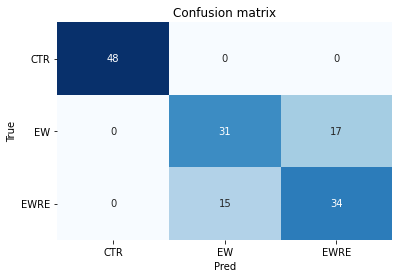

In [70]:
# word frequency (token-based) analysis
wa = Word_Freq_Analyzer('day','Group','writing_tokens',output_dir)
for word_pos in [['JJ'],['VB'],['NN']]:
    print(f"Now processing list for: {word_pos}\n")
    top_words_df = wa.func_top_words(writing_df,word_pos, 0)
    top_words_df.to_csv(
                        os.path.join(output_dir, 
                        '_'.join(['most_frequent',word_pos.pop(),
                        str(date.today())+'.csv']))
                        )
res_df,clf = wa.tf_idf_scores(writing_df,'writing',1)
wa.plot_confusion_matrix()


CTR: around walk minute lunch plan wake dinner bed breakfast watch
EW: friendship contact tell less university miss country never everyone pandemic
EWRE: felt career feel guess date covid experience lockdown find end


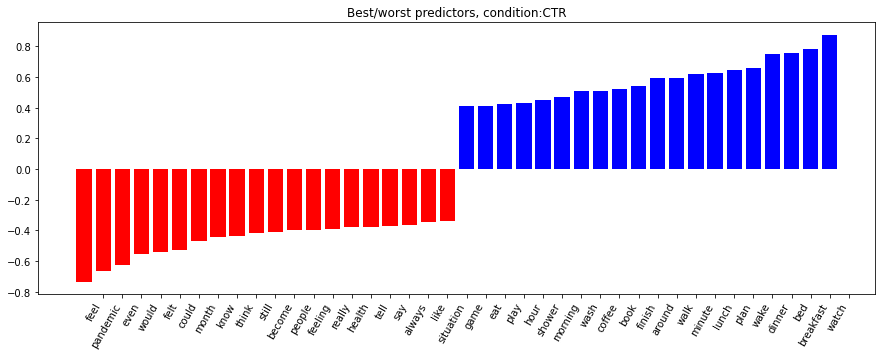

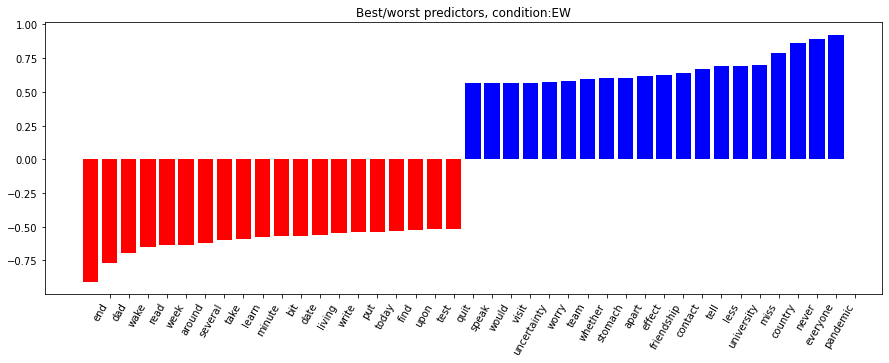

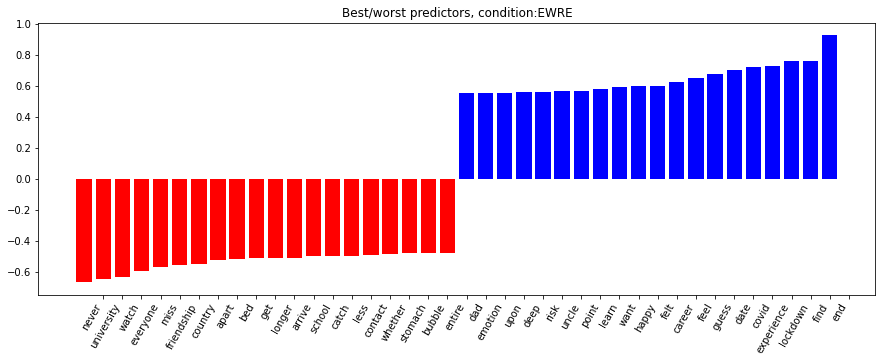

In [139]:
wa = Word_Freq_Analyzer('day','Group','writing_tokens',output_dir)
res_df,clf = wa.tf_idf_scores(writing_df,'writing',1)

In [152]:
import gensim.downloader as api
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
#from gensim.models import WordEmbeddingSimilarityIndex
from gensim.models import Word2Vec
from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity

#glove = api.load("glove-wiki-gigaword-50")    
#similarity_index = WordEmbeddingSimilarityIndex(glove)

class Similarity_Analyzer:
    """
    Class for Similarity analysis
    Based on Gensim.
    """
    def __init__(self, token_col, group_col, corpus_groups, embedding_model):
        self.token_col = token_col
        self.group_col = group_col
        self.corpus_groups = corpus_groups
        self.embedding_model = embedding_model
    
    def make_corpus(self, in_df):
        """
        Generate corpus.

        Parameters
        ----------
        in_df:  pd DataFrame
            input dataframe containing
            text in self.writing_col
        """
        corpus = in_df.loc[in_df[self.group_col].isin([self.corpus_groups]),self.token_col]
        self.corpus = list(corpus.values)
        return self.corpus
    
    def build_model(self):
        """
        Generate word embeddings.
        """
        self.model = Word2Vec(self.corpus, min_count=1,vector_size= 50,workers=3, window =3, sg = 1)
        return self.model
    

    

